# Diet and Cost Minimization Calculator
>    This calculator will minimize the cost given a set of food [variables] and constraints on those variables.  

## Table of Available Foods:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border:none;border-color:#ccc;margin:0px auto;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-xklw{font-weight:bold;font-family:"Times New Roman", Times, serif !important;;border-color:inherit;text-align:center}
.tg .tg-n603{font-family:"Times New Roman", Times, serif !important;;border-color:inherit;text-align:center}
.tg .tg-uys7{border-color:inherit;text-align:center}
.tg .tg-2spv{background-color:#ffffff;font-family:"Times New Roman", Times, serif !important;;border-color:inherit;text-align:center}
.tg .tg-4wfw{background-color:#f9f9f9;font-family:"Times New Roman", Times, serif !important;;border-color:inherit;text-align:center}
.tg .tg-aj9k{background-color:#f9f9f9;border-color:inherit;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-xklw">Categories</th>
    <th class="tg-xklw">Items</th>
    <th class="tg-xklw"> Carbohydrates (g)</th>
    <th class="tg-xklw">Protein (g)</th>
    <th class="tg-xklw">Fat (g)</th>
    <th class="tg-xklw">Calories</th>
    <th class="tg-xklw">Serving</th>
    <th class="tg-xklw">Cost ($/Serving)</th>
  </tr>
  <tr>
    <td class="tg-2spv" rowspan="6">Vegetables</td>
    <td class="tg-4wfw">Grean Beans</td>
    <td class="tg-4wfw">3</td>
    <td class="tg-4wfw">1</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">20</td>
    <td class="tg-4wfw">121g=1/2cup</td>
    <td class="tg-4wfw">0.38</td>
  </tr>
  <tr>
    <td class="tg-n603">Broccoli</td>
    <td class="tg-n603">4</td>
    <td class="tg-n603">1</td>
    <td class="tg-n603">0</td>
    <td class="tg-n603">25</td>
    <td class="tg-n603">3oz=1cup</td>
    <td class="tg-n603">0.27</td>
  </tr>
  <tr>
    <td class="tg-4wfw">Corn</td>
    <td class="tg-4wfw">11</td>
    <td class="tg-4wfw">2</td>
    <td class="tg-4wfw">1</td>
    <td class="tg-4wfw">60</td>
    <td class="tg-4wfw">4oz=1/2cup</td>
    <td class="tg-4wfw">0.36</td>
  </tr>
  <tr>
    <td class="tg-n603">Refried Beans</td>
    <td class="tg-n603">18</td>
    <td class="tg-n603">6</td>
    <td class="tg-n603">3</td>
    <td class="tg-n603">120</td>
    <td class="tg-n603">4oz</td>
    <td class="tg-n603">0.24</td>
  </tr>
  <tr>
    <td class="tg-4wfw">Brown Rice</td>
    <td class="tg-4wfw">140</td>
    <td class="tg-4wfw">16</td>
    <td class="tg-4wfw">6</td>
    <td class="tg-4wfw">640</td>
    <td class="tg-4wfw">180g=1cup</td>
    <td class="tg-4wfw">0.27</td>
  </tr>
  <tr>
    <td class="tg-uys7">Bread</td>
    <td class="tg-uys7">14</td>
    <td class="tg-uys7">3</td>
    <td class="tg-uys7">1</td>
    <td class="tg-uys7">70</td>
    <td class="tg-uys7">1 slice</td>
    <td class="tg-uys7">0.06</td>
  </tr>
  <tr>
    <td class="tg-4wfw" rowspan="4">Meat</td>
    <td class="tg-4wfw">Chicken</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">19</td>
    <td class="tg-4wfw">8</td>
    <td class="tg-4wfw">150</td>
    <td class="tg-4wfw">4oz</td>
    <td class="tg-4wfw">0.77</td>
  </tr>
  <tr>
    <td class="tg-n603">Ground Beef</td>
    <td class="tg-n603">0</td>
    <td class="tg-n603">22</td>
    <td class="tg-n603">14</td>
    <td class="tg-n603">210</td>
    <td class="tg-n603">4oz</td>
    <td class="tg-n603">1.00</td>
  </tr>
  <tr>
    <td class="tg-4wfw">Eggs</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">6</td>
    <td class="tg-4wfw">5</td>
    <td class="tg-4wfw">70</td>
    <td class="tg-4wfw">1egg</td>
    <td class="tg-4wfw">0.13</td>
  </tr>
  <tr>
    <td class="tg-n603">Whey</td>
    <td class="tg-n603">2</td>
    <td class="tg-n603">24</td>
    <td class="tg-n603">1</td>
    <td class="tg-n603">110</td>
    <td class="tg-n603">1 scoop</td>
    <td class="tg-n603">0.75</td>
  </tr>
  <tr>
    <td class="tg-2spv" rowspan="7">Dessert</td>
    <td class="tg-4wfw">Orange</td>
    <td class="tg-4wfw">15</td>
    <td class="tg-4wfw">1</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">62</td>
    <td class="tg-4wfw">1 orange</td>
    <td class="tg-4wfw">0.88</td>
  </tr>
  <tr>
    <td class="tg-n603">Apple</td>
    <td class="tg-n603">15</td>
    <td class="tg-n603">0</td>
    <td class="tg-n603">0</td>
    <td class="tg-n603">63</td>
    <td class="tg-n603">1 apple</td>
    <td class="tg-n603">0.22</td>
  </tr>
  <tr>
    <td class="tg-4wfw">Beer</td>
    <td class="tg-4wfw">7</td>
    <td class="tg-4wfw">1</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">110</td>
    <td class="tg-4wfw">12oz</td>
    <td class="tg-4wfw">0.83</td>
  </tr>
  <tr>
    <td class="tg-n603">Cheese</td>
    <td class="tg-n603">1</td>
    <td class="tg-n603">7</td>
    <td class="tg-n603">9</td>
    <td class="tg-n603">111</td>
    <td class="tg-n603">1oz</td>
    <td class="tg-n603">0.27</td>
  </tr>
  <tr>
    <td class="tg-2spv">Coke</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">0</td>
    <td class="tg-4wfw">12oz</td>
    <td class="tg-4wfw">0.36</td>
  </tr>
  <tr>
    <td class="tg-uys7">Mixed Nuts</td>
    <td class="tg-uys7">5</td>
    <td class="tg-uys7">6</td>
    <td class="tg-uys7">15</td>
    <td class="tg-uys7">170</td>
    <td class="tg-uys7">1oz</td>
    <td class="tg-uys7">0.43</td>
  </tr>
  <tr>
    <td class="tg-aj9k">Coconut OIl</td>
    <td class="tg-aj9k">0</td>
    <td class="tg-aj9k">0</td>
    <td class="tg-aj9k">14</td>
    <td class="tg-aj9k">120</td>
    <td class="tg-aj9k">1tbsp</td>
    <td class="tg-aj9k">0.10</td>
  </tr>
</table>

                                                                        https://www.tablesgenerator.com/html_tables#

>   We are going to use the above table, nutrition values, cost and Python to minimize cost given our constraints

## Initialize our Linear Program

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pulp

diet = pulp.LpProblem("Diet", pulp.LpMinimize)

carb={'Green_Beans':3,'Broccoli':4,'Corn':11,'Refried_Beans':18,'Brown_Rice':140,'Bread':14,'Chicken':0,'Ground_Beef':0,
      'Eggs':0,'Whey':2,'Orange':15,'Apple':15,'Beer':7,'Cheese':1,'Coke':0,'Mixed_Nuts':5,'Coconut_Oil':0}
protein={'Green_Beans':1,'Broccoli':1,'Corn':2,'Refried_Beans':6,'Brown_Rice':16,'Bread':3,'Chicken':19,'Ground_Beef':22,
      'Eggs':6,'Whey':24,'Orange':1,'Apple':0,'Beer':1,'Cheese':7,'Coke':0,'Mixed_Nuts':6,'Coconut_Oil':0}
fat={'Green_Beans':0,'Broccoli':0,'Corn':1,'Refried_Beans':3,'Brown_Rice':6,'Bread':1,'Chicken':8,'Ground_Beef':14,
      'Eggs':5,'Whey':1,'Orange':0,'Apple':0,'Beer':0,'Cheese':9,'Coke':0,'Mixed_Nuts':15,'Coconut_Oil':14}
cal={'Green_Beans':20,'Broccoli':25,'Corn':60,'Refried_Beans':120,'Brown_Rice':640,'Bread':70,'Chicken':150,'Ground_Beef':210,
      'Eggs':70,'Whey':110,'Orange':62,'Apple':63,'Beer':110,'Cheese':111,'Coke':0,'Mixed_Nuts':170,'Coconut_Oil':120}
cost={'Green_Beans':0.38,'Broccoli':0.27,'Corn':0.36,'Refried_Beans':0.24,'Brown_Rice':0.27,'Bread':0.06,'Chicken':0.77,'Ground_Beef':1.00,
      'Eggs':0.13,'Whey':0.63,'Orange':0.88,'Apple':0.22,'Beer':0.83,'Cheese':0.27,'Coke':0.36,'Mixed_Nuts':0.43,'Coconut_Oil':0.10}
serv={'Green_Beans':'121g=1/2cup','Broccoli':'3oz=1cup','Corn':'4oz=1/2cup','Refried_Beans':'4oz','Brown_Rice':'180g=1cup(dry)',
      'Bread':'1 slice','Chicken':'4oz','Ground_Beef':'4oz','Eggs':'1 egg','Whey':'1 scoop','Orange':'1 orange','Apple':'1 apple',
      'Beer':'12oz','Cheese':'1oz','Coke':'12oz','Mixed_Nuts':'1oz','Coconut_Oil':'1 tbsp'}

## Assumptions:
>    We want a 2000 Calorie per day diet:
>
>         Calories = 2000

>    And:
>
>         Carbs = 4 Calories per gram
        Protein = 4 Calories per gram
        Fat = 9 Calories per gram

## Define our variables

In [2]:
v1 = pulp.LpVariable('Green_Beans', lowBound=0, cat='Integer')
v2 = pulp.LpVariable('Broccoli', lowBound=0, cat='Integer')
v3 = pulp.LpVariable('Corn', lowBound=0, cat='Integer')
v4 = pulp.LpVariable('Refried_Beans', lowBound=0, cat='Integer')
v5 = pulp.LpVariable('Brown_Rice', lowBound=0, cat='Continuous')
v6 = pulp.LpVariable('Bread', lowBound=0, cat='Integer')
m1 = pulp.LpVariable('Chicken', lowBound=0, cat='Integer')
m2 = pulp.LpVariable('Ground_Beef', lowBound=0, cat='Integer')
m3 = pulp.LpVariable('Eggs', lowBound=0, cat='Integer')
m4 = pulp.LpVariable('Whey', lowBound=0, cat='Integer')
d1 = pulp.LpVariable('Orange', lowBound=0, cat='Integer')
d2 = pulp.LpVariable('Apple', lowBound=0, cat='Integer')
d3 = pulp.LpVariable('Beer', lowBound=0, cat='Integer')
d4 = pulp.LpVariable('Cheese', lowBound=0, cat='Integer')
d5 = pulp.LpVariable('Coke', lowBound=0, cat='Integer')
d6 = pulp.LpVariable('Mixed_Nuts', lowBound=0, cat='Integer')
d7 = pulp.LpVariable('Coconut_Oil', lowBound=0, cat='Integer')

## Objective Function

>    We Want To Minimize (Cost per Day)
>
>\begin{align} Cost = 0.38v_1+0.27v_2+0.36v_3+0.24v_4+0.27v_5+0.25v_6+0.77m_1+1.00m_2+0.13m_3+0.63m_4+0.88d_1+0.22d_2+0.83d_3+0.27d_4+0.36d_5+0.43d_6+0.10d_7
\end{align}



## Constraints
\begin{align}
\end{align}
>      Carbohydrates
>
>\begin{align}
4\times(3v_1+4v_2+11v_3+18v_4+140v_5+14v_6+0m_1+0m_2+0m_3+2m_4+15d_1+15d_2+7d_3+1d_4+0d_5+5d_6+0d_7) \leq \frac{Calories}{3}\\
\end{align}

>      Protein 
>
>\begin{align}
4\times(1v_1+1v_2+2v_3+6v_4+16v_5+3v_6+19m_1+22m_2+6m_3+24m_4+1d_1+0d_2+1d_3+7d_4+0d_5+6d_6+0d_7) = Goal\_Weight\times4\\
\end{align}

>      Fat 
>
>\begin{align}
9\times(0v_1+0v_2+1v_3+3v_4+6v_5+1v_6+8m_1+14m_2+5m_3+1m_4+0d_1+0d_2+0d_3+9d_4+0d_5+15d_6+14d_7) = \frac{Calories}{3}\\
\end{align}

>      Calories 
>
>\begin{align}
20v_1+25v_2+60v_3+120v_4+640v_5+70v_6+150m_1+210m_2+70m_3+110m_4+62d_1+63d_2+110d_3+111d_4+0d_5+170d_6+120d_7 = Calories\\
\end{align}

>      At least one of each group
>
>\begin{align}
v_1+v_2+v_3+v_4+v_5+v_6 \geq 1\\
m_1+m_2+m_3+m_4 \geq 1\\
d_1+d_2+d_3+d_4+d_5+d_6+d_7 \geq 1\\
\end{align}

>      Exactly 3 beers per day
>
>\begin{align}
d_3 = 3\\
\end{align}

>      Exactly 3 diet sodas per day
>
>\begin{align}
d_5 = 3\\
\end{align}

## Add Python Constraints

In [3]:
# Omar
#Calories=2000
#eps=Calories*.05*0
#Goal_Weight=170

# Dee
Calories=1500
eps=Calories*.05*0
Goal_Weight=130*0.8

In [4]:
diet += 4*(carb['Green_Beans']*v1+carb['Broccoli']*v2+carb['Corn']*v3+carb['Refried_Beans']*v4 \
    +carb['Brown_Rice']*v5+carb['Bread']*v6+carb['Chicken']*m1+carb['Ground_Beef']*m2+carb['Eggs']*m3 \
    +carb['Whey']*m4+carb['Orange']*d1+carb['Apple']*d2+carb['Beer']*d3+carb['Cheese']*d4 \
    +carb['Coke']*d5+carb['Mixed_Nuts']*d6+carb['Coconut_Oil']*d7) <= Calories
diet += 4*(protein['Green_Beans']*v1+protein['Broccoli']*v2+protein['Corn']*v3+protein['Refried_Beans']*v4 \
    +protein['Brown_Rice']*v5+protein['Bread']*v6+protein['Chicken']*m1+protein['Ground_Beef']*m2+protein['Eggs']*m3+protein['Whey']*m4 \
    +protein['Orange']*d1+protein['Apple']*d2+protein['Beer']*d3+protein['Cheese']*d4+protein['Coke']*d5 \
    +protein['Mixed_Nuts']*d6+protein['Coconut_Oil']*d7) <= Goal_Weight*4
diet += 4*(protein['Green_Beans']*v1+protein['Broccoli']*v2+protein['Corn']*v3+protein['Refried_Beans']*v4 \
    +protein['Brown_Rice']*v5+protein['Bread']*v6+protein['Chicken']*m1+protein['Ground_Beef']*m2+protein['Eggs']*m3+protein['Whey']*m4 \
    +protein['Orange']*d1+protein['Apple']*d2+protein['Beer']*d3+protein['Cheese']*d4+protein['Coke']*d5 \
    +protein['Mixed_Nuts']*d6+protein['Coconut_Oil']*d7) >= Goal_Weight*4   
diet += 9*(fat['Green_Beans']*v1+fat['Broccoli']*v2+fat['Corn']*v3+fat['Refried_Beans']*v4+fat['Brown_Rice']*v5 \
    +fat['Bread']*v6+fat['Chicken']*m1+fat['Ground_Beef']*m2+fat['Eggs']*m3+fat['Whey']*m4+fat['Orange']*d1+fat['Apple']*d2 \
    +fat['Beer']*d3+fat['Cheese']*d4+fat['Coke']*d5+fat['Mixed_Nuts']*d6+fat['Coconut_Oil']*d7) <= Calories
diet += cal['Green_Beans']*v1+cal['Broccoli']*v2+cal['Corn']*v3+cal['Refried_Beans']*v4+cal['Brown_Rice']*v5 \
    +cal['Bread']*v6+cal['Chicken']*m1+cal['Ground_Beef']*m2+cal['Eggs']*m3+cal['Whey']*m4+cal['Orange']*d1+cal['Apple']*d2 \
    +cal['Beer']*d3+cal['Cheese']*d4+cal['Coke']*d5+cal['Mixed_Nuts']*d6+cal['Coconut_Oil']*d7 <= Calories+eps
diet += cal['Green_Beans']*v1+cal['Broccoli']*v2+cal['Corn']*v3+cal['Refried_Beans']*v4+cal['Brown_Rice']*v5 \
    +cal['Bread']*v6+cal['Chicken']*m1+cal['Ground_Beef']*m2+cal['Eggs']*m3+cal['Whey']*m4+cal['Orange']*d1+cal['Apple']*d2 \
    +cal['Beer']*d3+cal['Cheese']*d4+cal['Coke']*d5+cal['Mixed_Nuts']*d6+cal['Coconut_Oil']*d7 >= Calories-eps



In [5]:
#diet += v1+v2+v3+v4+v5+v6 >= 1
#diet += m1+m2+m3+m4 >= 1
#diet += d1+d2+d3+d4+d5+d6 >= 1

#diet += v6 <= 6  # Bread
diet += d3 >= 3  # Beer
diet += d3 <= 3  # Beer
#diet += d5 <= 2  # Soda
#diet += d5 >= 2  # Soda 
diet += m4 <= 4  # Whey
#diet += d2 <= 1  # Apple
#diet += v2 <= 2  # Broccoli
#diet += m3 <= 6  # Eggs
diet += v4 <= 2  # Beans
diet += v4 >= 1  # Beans

## Now Define Our Objective Function

In [6]:
diet += cost['Green_Beans']*v1+cost['Broccoli']*v2+cost['Corn']*v3+cost['Refried_Beans']*v4+cost['Brown_Rice']*v5 \
    +cost['Bread']*v6+cost['Chicken']*m1+cost['Ground_Beef']*m2+cost['Eggs']*m3+cost['Whey']*m4+cost['Orange']*d1 \
    +cost['Apple']*d2+cost['Beer']*d3+cost['Cheese']*d4+cost['Coke']*d5+cost['Mixed_Nuts']*d6+cost['Coconut_Oil']*d7, "Cost"

## We can now solve this system of equations

\begin{equation*}
A =  \begin{vmatrix}
3 & 1 & 5 & 5 & 35 & 0 & 0 & 0 & 2 & 15 & 15 & 7 & 1 & 0 & -\frac{Calories}{3 \times 4}\\
1 & 0 & 1 & 2 & 4 & 19 & 22 & 6 & 24 & 1 & 0 & 1 & 7 & 0 & -\frac{Calories}{3 \times 4}\\
-1 & 0 & -1 & -2 & -4 & -19 & -22 & -6 & -24 & -1 & 0 & -1 & -7 & 0 & \frac{Calories}{3 \times 4}\\
0 & 0 & 0 & 1 & 2 & 8 & 14 & 5 & 1 & 0 & 0 & 0 & 9 & 0 & -\frac{Calories}{3 \times 9}\\
20 & 4 & 23 & 30 & 160 & 150 & 210 & 70 & 110 & 62 & 63 & 110 & 111 & 0 & -Calories\\
-20 & -4 & -23 & -30 & -160 & -150 & -210 & -70 & -110 & -62 & -63 & -110 & -111 & 0 & Calories\\
-1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0\\
0.38 & 0.09 & 0.09 & 0.06 & 0.07 & 0.77 & 1.00 & 0.13 & 0.63 & 0.88 & 0.22 & 0.67 & 0.27 &0.36 & 1\\
\end{vmatrix}
\end{equation*}

In [7]:
diet.solve()
print(pulp.LpStatus[diet.status])

Optimal


# Results

In [8]:
np.set_printoptions(precision=2)
print("\tDaily Meal Cost $" + str(round(pulp.value(diet.objective),2)))



	Daily Meal Cost $4.96


In [9]:
csum=psum=fsum=ccsum=cccsum=0
for var in diet.variables():
    csum += var.varValue * carb[str(var)]
    psum += var.varValue * protein[str(var)]
    fsum += var.varValue * fat[str(var)]
    ccsum += var.varValue * cal[str(var)]
    cccsum += var.varValue * cost[str(var)]

print("\t" + str(round(csum)) + " grams of carbs for " + str(round(4*csum)) + " calories")
print("\t" + str(round(psum)) + " grams of protein for " + str(round(4*psum)) + " calories")
print("\t" + str(round(fsum)) + " grams of fat for " + str(round(9*fsum)) + " calories")
print("\t" + str(round(ccsum)) + " total calories")

	143 grams of carbs for 571 calories
	104 grams of protein for 416 calories
	36 grams of fat for 323 calories
	1500 total calories


	3.0 x 12oz of Beer
	4.0 x 1 slice of Bread
	0.31 x 180g=1cup(dry) of Brown_Rice
	5.0 x 1 egg of Eggs
	1.0 x 4oz of Refried_Beans
	2.0 x 1 scoop of Whey





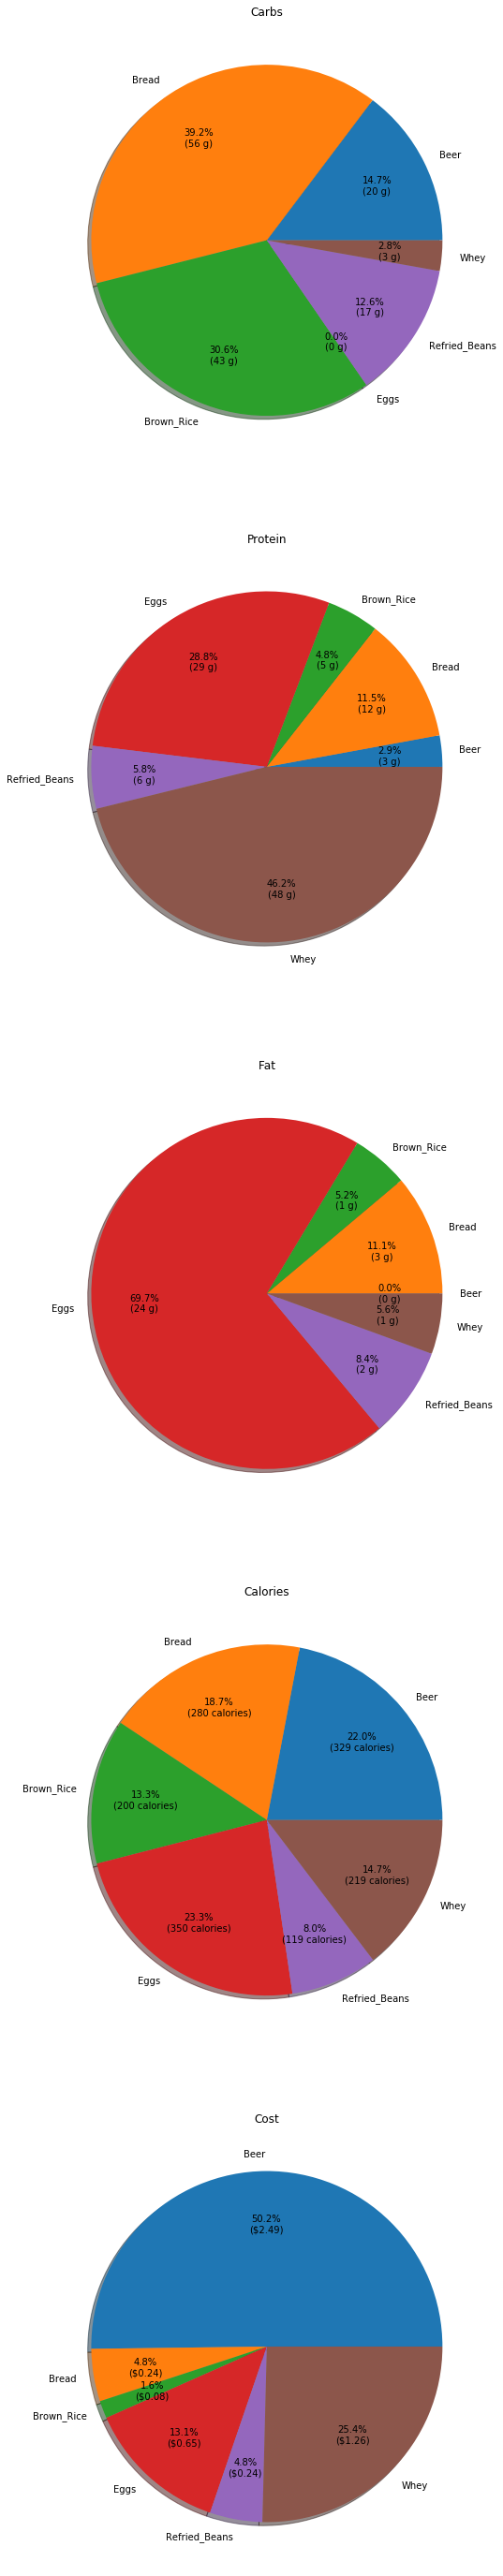

In [10]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

def func1(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    return "{:.1f}%\n(${:.2f})".format(pct, absolute)

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} calories)".format(pct, absolute)

namesData=[]
carbsData=[]
proteinData=[]
fatData=[]
calData=[]
costData=[]

for var in diet.variables():
    if var.varValue > 0:
        print("\t" + str(round(var.varValue,2)) + " x " + serv[str(var)] + " of " + var.name)
        namesData.append(str(var))
        carbsData.append(round(var.varValue*carb[str(var)],2))
        proteinData.append(round(var.varValue*protein[str(var)],2))
        fatData.append(round(var.varValue*fat[str(var)],2))
        calData.append(round(var.varValue*cal[str(var)],2))
        costData.append(round(var.varValue*cost[str(var)],2))
        
print('\n\n')
pp.subplot(5,1,1) 
pp.pie(carbsData,labels=namesData, autopct=lambda pct: func(pct, carbsData),shadow=True,pctdistance=.7)
pp.title("Carbs");

pp.subplot(5,1,2) 
pp.pie(proteinData,labels=namesData, autopct=lambda pct: func(pct, proteinData),shadow=True,pctdistance=.7)
pp.title("Protein");

pp.subplot(5,1,3) 
pp.pie(fatData,labels=namesData, autopct=lambda pct: func(pct, fatData),shadow=True,pctdistance=.7)
pp.title("Fat");

pp.subplot(5,1,4) 
pp.pie(calData,labels=namesData, autopct=lambda pct: func2(pct, calData),shadow=True,pctdistance=.7)
pp.title("Calories");

pp.subplot(5,1,5) 
pp.pie(costData,labels=namesData, autopct=lambda pct: func1(pct, costData),shadow=True,pctdistance=.7)
pp.title("Cost");

fig=pp.gcf()
fig.set_size_inches(50,50)


pp.show()